Programa para testar as funções de ajuste dos modelos.

Baseado em dados antigos (dados do artigo do modelo exponencial).

Algumas funções não funcionam mais.

In [1]:
import pandas as pd
import numpy as np

import class_pig  

import glob
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import os
from scipy.optimize import curve_fit
"""
CUIDADO!!
"""
import warnings
warnings.filterwarnings("ignore")

In [2]:
from fitterClass import funcFitter
from utils import find_best_b, plot_exponentials

* d para Doente
* s para Saudavel

## Loading Data 

In [3]:
with open("data//doente.txt", "r") as file:
    d_data = file.readlines()
    #Cleaning
    d_data = np.array([list(map(float, row.split())) for row in d_data if row != '\n'])

with open("data//normal.txt", "r") as file:
    s_data = file.readlines()
    #Cleaning
    s_data = np.array([list(map(float, row.split())) for row in s_data if row != '\n'])
    
#with open("data//k_func.txt", "r") as file: # k_func.txt não existe mais...
with open("data//doente.txt", "r") as file:
    k_data = file.readlines()
    #Cleaning
    k_data = np.array([list(map(float, row.split())) for row in k_data if row != '\n'])

In [4]:
k_data

array([[ 1.05461847e+01, -3.24999420e-01],
       [ 2.17429719e+01,  1.51937229e+02],
       [ 1.54618474e+01,  1.13610511e+02],
       [ 2.66586345e+01,  2.36971005e+02],
       [ 2.03775100e+01,  2.73788797e+02],
       [ 3.14377510e+01,  4.20317107e+02],
       [ 2.54297189e+01,  4.74383081e+02],
       [ 3.66265060e+01,  6.09304269e+02],
       [ 3.04819277e+01,  6.51855979e+02],
       [ 4.09959839e+01,  7.63887922e+02]])

## Cleaning 

In [5]:
d_data[6,1] = 466 # valor corrigido

## Fitting Sigmoid

### Parameters

In [6]:
def sigmoid(x, a, b, c, d):
    return a + b/(1 + np.exp(-(x-c)/d))

def exponential(x, a, b, c, d):
    return a - b*np.exp(-(x-c)/d)

def exponential_cicle_fixed_b(x, a, c):
    return -a*np.exp(-best_b*x)+c

estimators = ["lm", "trf", "dogbox"]
funcs = [sigmoid, exponential]

### K data

In [7]:
#Interpolando
# funcFitter(subject:str, manobra:str, raw_data, data:np.ndarray, n_point:int=5, estimators:list=["lm"])
fitter_k = funcFitter("mra26", "D", k_data, k_data[0::2, :], n_point = 5, estimators = estimators)
k_df = fitter_k.fit(funcs=funcs, interpolate=True, n_interp_point=100, interp_method="linear")
k_df.to_csv(os.path.join("data","k_df.csv"), index = False)
k_df.head(2)

,subject,manobra,n_point,function,function_name,estimator,error,param,interp_point,interp_pressure,interp_volume,raw_data
0,mra26,D,5,<function sigmoid at 0x7f443c44e310>,sigmoid,trf,1.239690,"[-137.47245572541627, 1075.4302113641606, 23.5...",5,"[10.546184739, 15.53012048195, 20.514056224900...","[-0.324999419644, 115.83520981764416, 279.2102...","[[10.546184739, -0.324999419644], [21.74297188..."
1,mra26,D,5,<function sigmoid at 0x7f443c44e310>,sigmoid,trf,3.143767,"[-161.87190596778518, 1151.0165358156034, 23.9...",10,"[10.546184739, 12.761267291422222, 14.97634984...","[-0.324999419644, 51.016311015736, 102.3576214...","[[10.546184739, -0.324999419644], [21.74297188..."


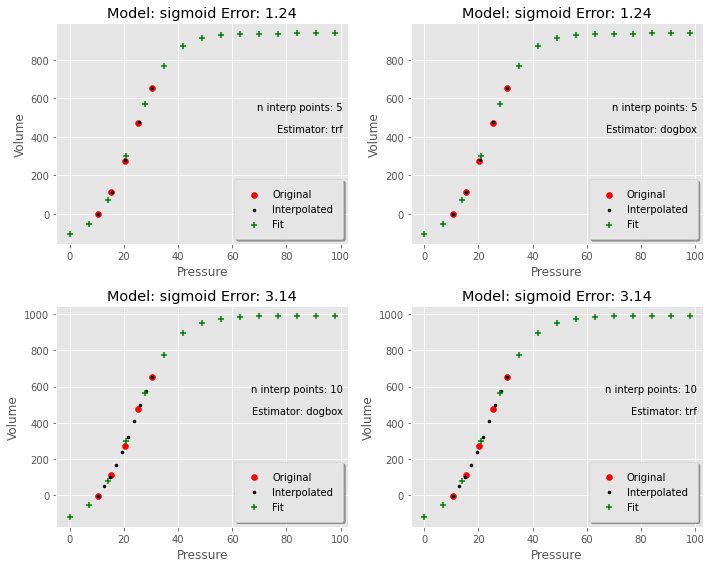

In [8]:
fitter_k.make_plot(df = k_df, n_best = 4)

In [9]:
k_df

,subject,manobra,n_point,function,function_name,estimator,error,param,interp_point,interp_pressure,interp_volume,raw_data
0,mra26,D,5,<function sigmoid at 0x7f443c44e310>,sigmoid,trf,1.239690,"[-137.47245572541627, 1075.4302113641606, 23.5...",5,"[10.546184739, 15.53012048195, 20.514056224900...","[-0.324999419644, 115.83520981764416, 279.2102...","[[10.546184739, -0.324999419644], [21.74297188..."
1,mra26,D,5,<function sigmoid at 0x7f443c44e310>,sigmoid,trf,3.143767,"[-161.87190596778518, 1151.0165358156034, 23.9...",10,"[10.546184739, 12.761267291422222, 14.97634984...","[-0.324999419644, 51.016311015736, 102.3576214...","[[10.546184739, -0.324999419644], [21.74297188..."
2,mra26,D,5,<function sigmoid at 0x7f443c44e310>,sigmoid,trf,3.215376,"[-155.40888496514634, 1134.4780277528992, 23.8...",15,"[10.546184739, 11.970166379842857, 13.39414802...","[-0.324999419644, 32.680128717386005, 65.68525...","[[10.546184739, -0.324999419644], [21.74297188..."
3,mra26,D,5,<function sigmoid at 0x7f443c44e310>,sigmoid,trf,3.271205,"[-151.49256349688173, 1121.6478374278165, 23.8...",20,"[10.546184739, 11.595434369094736, 12.64468399...","[-0.324999419644, 23.99456868132547, 48.314136...","[[10.546184739, -0.324999419644], [21.74297188..."
4,mra26,D,5,<function sigmoid at 0x7f443c44e310>,sigmoid,trf,3.289887,"[-148.6575105444855, 1113.3134482730886, 23.79...",25,"[10.546184739, 11.376840696158332, 12.20749665...","[-0.324999419644, 18.927991993623493, 38.18098...","[[10.546184739, -0.324999419644], [21.74297188..."
...,...,...,...,...,...,...,...,...,...,...,...,...
63,mra26,D,5,<function exponential at 0x7f43e00b0040>,exponential,dogbox,68.596607,"[803.106006428429, 941.663542975223, 10.0, 15.0]",65,"[10.546184739, 10.857680722934374, 11.16917670...","[-0.324999419644, 6.8948723603313065, 14.11474...","[[10.546184739, -0.324999419644], [21.74297188..."
64,mra26,D,5,<function exponential at 0x7f43e00b0040>,exponential,dogbox,68.647009,"[803.1443820777089, 127.48469754649754, 39.999...",70,"[10.546184739, 10.835108550185506, 11.12403236...","[-0.324999419644, 6.371693245840338, 13.068385...","[[10.546184739, -0.324999419644], [21.74297188..."
65,mra26,D,5,<function exponential at 0x7f43e00b0040>,exponential,dogbox,68.686062,"[803.1844436306474, 127.51562909768342, 39.999...",75,"[10.546184739, 10.815586671051351, 11.08498860...","[-0.324999419644, 5.919214011686012, 12.163427...","[[10.546184739, -0.324999419644], [21.74297188..."
66,mra26,D,5,<function exponential at 0x7f43e00b0040>,exponential,dogbox,68.722692,"[803.2163418026074, 942.4164698064305, 10.0, 1...",80,"[10.546184739, 10.798535915858228, 11.05088709...","[-0.324999419644, 5.524010629956268, 11.373020...","[[10.546184739, -0.324999419644], [21.74297188..."


In [10]:
### ESTAS FUNÇÕES NÃO FUNCIONAM MAIS COM ESSES PARÂMETROS...
#best_b, guess_zero = find_best_b(k_df, raw_pressures=k_data,  b_percentage_range=(0.05,0.125), step=0.001, plot_figure=False)
#plot_exponentials(best_b, guess_zero, k_df, k_data, exponential_cicle_fixed_b)